# Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).


Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and addditionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.



1. Is it true that the younger a passenger was, they had more chance of survival? Is this difference statistically important? 
2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find. 

##### More specifically, the tasks that you need to enounter in your deliverables are:

1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.

2. State the null and the alternative hypotheses that address the questions.

3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.

5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.

6. Apply t-test statistic if you pass successfully the normality checks

7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic):

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let $z=1.96$ for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`
    

8. Elaborate on the results of your analyses.

In [1]:
import pandas as pd
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.**

In [2]:
titanic_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')

titanic_df.info()

titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_df['Age'].isnull().sum()

177

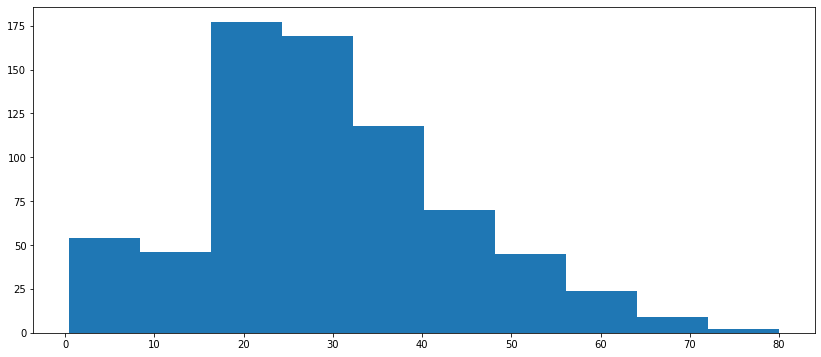

In [15]:
plt.figure(figsize=(14,6))
plt.hist(titanic_df['Age'].dropna())
plt.show()

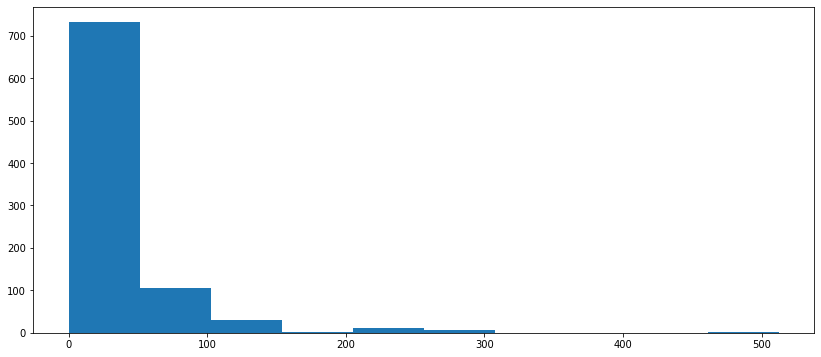

In [51]:
plt.figure(figsize=(14,6))
plt.hist(titanic_df['Fare'])
plt.show()

**2. State the null and the alternative hypotheses that address the questions.**

**Part 1.**

Null Hypothesis: On average, there is no difference in the passenger's age and chance of survival.

Alternative Hypothesis: On average, does the age of the passsenger increase or decrease the passenger's chance of survival?

**Part 2.**

Null Hypothesis: There is no correlation between the fare price and the passenger's chance of survival.

Alternative Hypothesis: On average, does the fare price increase or decrease the passenger's chance of survival? 

**3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.**

In [34]:
survived_yes = titanic_df[(titanic_df['Survived']== 1)]
survived_yes.info()

survived_no = titanic_df[(titanic_df['Survived']==0)]
survived_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  342 non-null    int64  
 1   Survived     342 non-null    int64  
 2   Pclass       342 non-null    int64  
 3   Name         342 non-null    object 
 4   Sex          342 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        342 non-null    int64  
 7   Parch        342 non-null    int64  
 8   Ticket       342 non-null    object 
 9   Fare         342 non-null    float64
 10  Cabin        136 non-null    object 
 11  Embarked     340 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  549 non-null    int64  
 1   Survived

In [36]:
age_survived_yes = survived_yes[survived_yes['Age'].notna()]
age_survived_yes.info()

age_survived_no = survived_no[survived_no['Age'].notna()]
age_survived_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  290 non-null    int64  
 1   Survived     290 non-null    int64  
 2   Pclass       290 non-null    int64  
 3   Name         290 non-null    object 
 4   Sex          290 non-null    object 
 5   Age          290 non-null    float64
 6   SibSp        290 non-null    int64  
 7   Parch        290 non-null    int64  
 8   Ticket       290 non-null    object 
 9   Fare         290 non-null    float64
 10  Cabin        125 non-null    object 
 11  Embarked     288 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 29.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  424 non-null    int64  
 1   Survived

**4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.**

**Part 1- Age vs Survival**

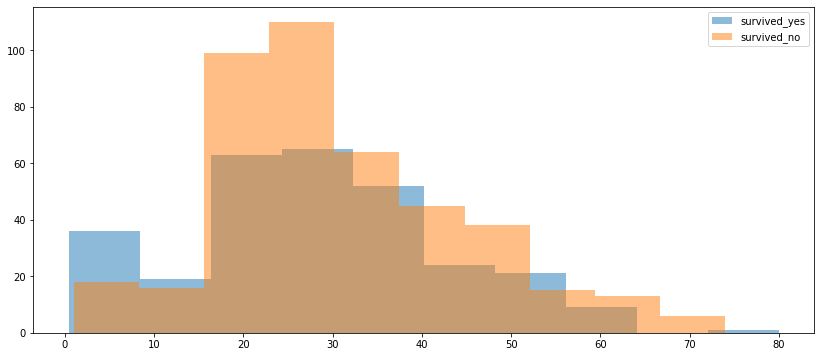

In [33]:
plt.figure(figsize=(14,6))
plt.hist(age_survived_yes['Age'], alpha = 0.5, label = 'survived_yes')
plt.hist(age_survived_no['Age'], alpha = 0.5, label= 'survived_no')
plt.legend()
plt.show()

**Part 2- Fare vs Survival**

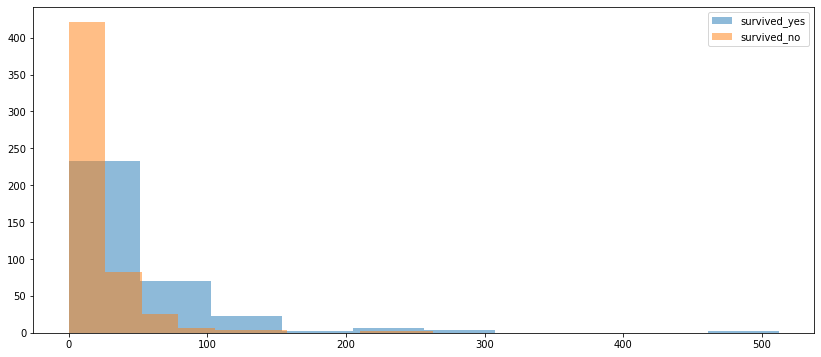

In [37]:
plt.figure(figsize=(14,6))
plt.hist(survived_yes['Fare'], alpha = 0.5, label = 'survived_yes')
plt.hist(survived_no['Fare'], alpha = 0.5, label= 'survived_no')
plt.legend()
plt.show()

**5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.**

**Part 1- Age vs Survival**

In [38]:
stats.describe(age_survived_yes['Age'])

DescribeResult(nobs=290, minmax=(0.42, 80.0), mean=28.343689655172415, variance=223.53096523207253, skewness=0.17952298982985943, kurtosis=-0.07723188107788648)

In [39]:
stats.describe(age_survived_no['Age'])

DescribeResult(nobs=424, minmax=(1.0, 74.0), mean=30.62617924528302, variance=200.84869836968645, skewness=0.5835101027554267, kurtosis=0.2652058747777071)

In [40]:
print('Shapiro-Wilk:')
print(stats.shapiro(age_survived_yes['Age']))
print(stats.shapiro(age_survived_no['Age']))
print('Jarque-Bera:')
print(stats.jarque_bera(age_survived_yes['Age']))
print(stats.jarque_bera(age_survived_no['Age']))
print('D\'Agostino-Pearson:')
print(stats.normaltest(age_survived_yes['Age']))
print(stats.normaltest(age_survived_no['Age']))

Shapiro-Wilk:
(0.9827256798744202, 0.0014263729099184275)
(0.968936026096344, 7.814121261162654e-08)
Jarque-Bera:
(1.6297852458226854, 0.44268685923551987)
(25.303442250873925, 3.2020442454205877e-06)
D'Agostino-Pearson:
NormaltestResult(statistic=1.6177859604065434, pvalue=0.44535080559478313)
NormaltestResult(statistic=23.069052752540895, pvalue=9.786307175880915e-06)


Though the graph doesn't look normal, the values for skewness and kurtosis are small and the difference in variance is relatively small as well. Therefore, we can determine the distribution is normal enough for a t-test.

**Part 2- Fare vs Survival**

In [41]:
stats.describe(survived_yes['Fare'])

DescribeResult(nobs=342, minmax=(0.0, 512.3292), mean=48.39540760233918, variance=4435.160158368154, skewness=3.8458166819167294, kurtosis=20.343694359915972)

In [42]:
stats.describe(survived_no['Fare'])

DescribeResult(nobs=549, minmax=(0.0, 263.0), mean=22.117886885245902, variance=985.2195092053387, skewness=4.540690741165962, kurtosis=26.12023942326097)

In [43]:
print('Shapiro-Wilk:')
print(stats.shapiro(survived_yes['Fare']))
print(stats.shapiro(survived_no['Fare']))
print('Jarque-Bera:')
print(stats.jarque_bera(survived_yes['Fare']))
print(stats.jarque_bera(survived_no['Fare']))
print('D\'Agostino-Pearson:')
print(stats.normaltest(survived_yes['Fare']))
print(stats.normaltest(survived_no['Fare']))

Shapiro-Wilk:
(0.5967270135879517, 1.8337420335182354e-27)
(0.513036847114563, 3.233740189307736e-36)
Jarque-Bera:
(6740.636517189708, 0.0)
(17493.39083494619, 0.0)
D'Agostino-Pearson:
NormaltestResult(statistic=310.50821173969666, pvalue=3.749717312272261e-68)
NormaltestResult(statistic=542.7161174365979, pvalue=1.4147916196682132e-118)


The distribution is clearly not normal as can be seen both in the visualization above and the statistical analysis that shows a large difference in variance, larger than 3 skewness, and kurtosis values well above 1. Therefore, it does not pass the normality checks.

**6. Apply t-test statistic if you pass successfully the normality checks**

In [44]:
stats.ttest_ind(age_survived_yes['Age'], age_survived_no['Age'])

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

**7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic)**

In [49]:
def get_95_ci(array_1, array_2):
  sample_1_n = array_1.shape[0]
  sample_2_n = array_2.shape[0]
  sample_1_mean = array_1.mean()
  sample_2_mean = array_2.mean()
  sample_1_var = array_1.var()
  sample_2_var = array_2.var()
  mean_diff = sample_2_mean - sample_1_mean
  se_diff = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
  ci_lower = mean_diff - (1.96*se_diff)
  ci_upper = mean_diff + (1.96*se_diff)
  return (ci_lower, ci_upper)

In [50]:
get_95_ci(age_survived_yes['Age'], age_survived_no['Age'])

(0.0959725945838561, 4.469006585637352)

**8. Elaborate on the results of your analyses.**

**Part 1- Age vs Survival**

The p-value is about 0.04 and is less than 0.05, therefore we can barely reject the null hypothesis.

So we can say there is a 4% chance of observing a difference as large or larger as was observed due to random error.

We can say with 95% confidence that on average the age of a survivor is between .01 to 4.47 years younger than the age of a non-survivor. Therefore, our alternative hypothesis is true as a younger passenger had a slightly higher chance of survival.


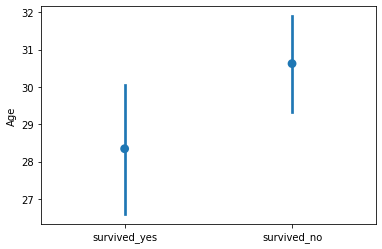

In [56]:
g = sns.pointplot(data=[age_survived_yes['Age'],
                        age_survived_no['Age']], join=False)
                        
g.set(xticklabels = ['survived_yes', 'survived_no'])
plt.ylabel('Age')
plt.show()

**Part 2- Fare vs Survival**

This distribution did not pass the normality checks, therefore we could not conclude whether our hypotheses are true or not.